<a href="https://colab.research.google.com/github/EkanshSaraf/ML_Models/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron classification accuracy 1.0


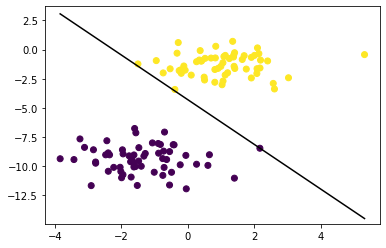

In [6]:
import numpy as np
class Perceptron:

  def __init__(self,lr,n_iters):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def unit_step(self,x):
    return 1 if x>=0 else 0

  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for i in range(self.n_iters):
      y_lin = np.dot(X,self.weights) + self.bias
      y_pred = [self.unit_step(y_lin_e) for y_lin_e in y_lin]

      dw = np.dot(X.T,(y-y_pred))
      db = np.sum(y-y_pred)

      self.weights += self.lr*dw
      self.bias += self.lr*db

  def predict(self,X):
    y_lin = np.dot(X,self.weights) + self.bias
    y_pred = [self.unit_step(y_lin_e) for y_lin_e in y_lin]
    return y_pred


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    p = Perceptron(lr=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)


    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")


    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()